# Integral Exercise # 1

In [1]:
import sympy as sp
x = sp.Symbol('x')
sp.integrate(3.0*x**2 +1, x)

1.0*x**3 + 1.0*x

In [2]:
# Doing numerically
from scipy.integrate import quad
#lets define a function

def f(y):
    return 3.0*y**2 +1
#print(f(2)) -> test it if it work

i = quad(f,0,2)
print(i)
print(i[0])


(10.000000000000002, 1.1102230246251568e-13)
10.000000000000002


In [3]:
i, error = quad(f, 0, 2)
print(i)
print(error)

10.000000000000002
1.1102230246251568e-13


In [4]:
# try yourself and plot this with you ipynb
# play around with http://wolframalpha.com, cool site for mathematics
from IPython.display import display, Math, Latex
display(Math(r'f(x) = \int_{0}^{2\pi}e^{-x}{sin(3x)} dx'))

<IPython.core.display.Math object>

In [5]:
#Solution
from scipy.integrate import quad
import numpy as np
# import sympy as sp - this wont really work, you can and should try throwing in numbers to see why its deosn't!

def f(x):
    return np.exp(-x)*np.sin(3.0*x)
i = quad(f, 0, 2*np.pi)
print(i)

(0.29943976718048754, 5.05015300411582e-13)


## Exercise 2:  Simple derivatives or as I'd prefer to call differentials 

In [6]:
# Finding derivative the simple math way

def f(x):
    return x**2

def differential(x):
    h =  1.0/1000.0
    rise = f(x + h) - f(x)
    run = h
    slope = rise / run
    return slope

print(differential(1))
print(differential(2))
print(differential(3))
print(differential(4))

2.0009999999996975
4.000999999999699
6.000999999999479
8.0010000000037


In [7]:
# Integrals are essentially the area under the sinusoidal curve tha covers 
# all reactangular boxes undr the curve covered
def integral(startx, endx, numberofrectangles):
#     width = ((endx) - (startx)) /numberofrectangles = Makes no difference in Py 3.6, with or without float
    width = (float(endx) - float(startx)) /numberofrectangles
    runningSum = 0
    for i in range(numberofrectangles):
        height = f(startx + i*width)
        area = height*width
        runningSum += area
    return runningSum
print('Area is: ', integral(0, 1, 10))
print('Area is: ', integral(0, 1, 1000))
print('Area is: ', integral(0, 1, 100000))

Area is:  0.2850000000000001
Area is:  0.33283350000000034
Area is:  0.33332833334999745


## Exercise 3: More integration, interpolation and curve fitting

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import *

#### You've seen one example of integra before, but lets try another one 

Try solving this: 
$f(x) = \int_{0}^{1}3x^2 + {1} dx$
#### Also BTW just use dollar sign before and after your formula as this $your formula$
to display formulas in your iPython Notebook use the inline function such as 
$$e^x=\sum_{i=0}^\infty \frac{1}{i!}x^i$$

In [9]:
def f(x):
    return 3.0*x**2 + 1.0
xlow = 0
xhigh = 1
i, err = quad(f, xlow, xhigh)
print("Integral is: ", i)
print("Error is :", err)
# Use help(quad) to see what more it can do

Integral is:  2.0
Error is : 2.220446049250313e-14


#### Let's try interpolation 

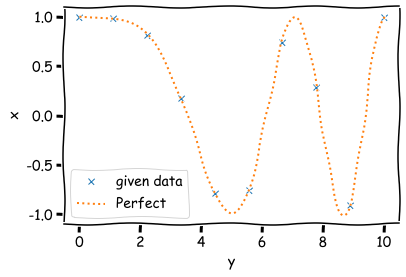

In [10]:
from scipy.interpolate import * # We want interpid function
plt.xkcd()

# Here basically you have a series of data points.
# You want to estimate data points that are between given points
# you want to *linearly* interpolate between the given function (meaning drawing a straight line)
# Or, you can use higher order, called polynomial interpolation to approximate the curve between the data points
# Cubic spline is a popular example of this

x_givenpoint = np.linspace(0, 10, 10)
y_givenpoint = np.cos(x_givenpoint**2.0/8.0)



# Now we create an array
xx = np.linspace(0, 10, 1000)
yy = np.cos(xx**2.0/8.0)

plt.plot(x_givenpoint, y_givenpoint, 'x', label = 'given data')
plt.plot(xx, yy, ':', label='Perfect')
plt.ylabel('x')
plt.xlabel('y')
plt.legend(loc='best')


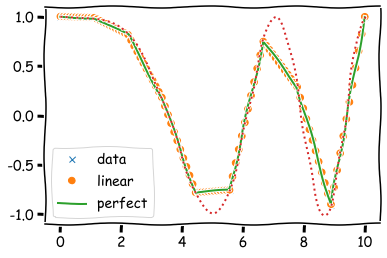

In [11]:
x_i = np.linspace(0, 10, 100) #

# do linear interpolation
f_linear = interp1d(x_givenpoint, y_givenpoint)
y_il = f_linear(x_i)

# Cubic spline interpolation

f_spline = interp1d(x_givenpoint, y_givenpoint, kind='cubic')
y_is = f_linear(x_i)

# plot these results
plt.plot(x_givenpoint, y_givenpoint, 'x')
plt.plot(x_i, y_il, 'o')
plt.plot(x_i, y_is, '-')
plt.plot(xx, yy, ':')
plt.legend(['data', 'linear', 'perfect'], loc='best')

#### Curve fitting - how does it look like?

(-2, 2)

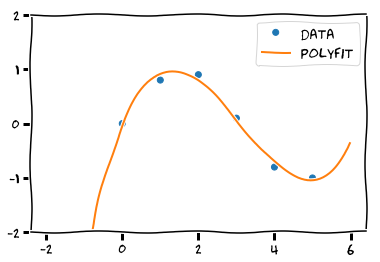

In [93]:
x_given = np.array([0., 1., 2., 3., 4., 5.])
y_given = np.array([0, 0.8, 0.9, 0.1, -0.8, -1.0])

x_p = np.linspace(-2.0, 6.0, 100)    # Data for plotting the pply fit
p3 = np.polyfit(x_given, y_given, 3) # 3rd order polynomial object
y_p = np.polyval(p3, x_p)
plt.plot(x_given, y_given, 'o')
plt.plot(x_p, y_p, '-')
plt.legend(['data', 'polyfit'], loc='best')
plt.ylim(-2, 2)

In [94]:
print(p3)

[ 0.08703704 -0.81349206  1.69312169 -0.03968254]


#### Lets do some curve fitting
This function is available from scipy.optimizer import * 
Fit function from scipy.org 
$f(x) = a^-bx + c$

In [95]:
from scipy.optimize import *

a=2.29404, b=1.49633, c=0.802552


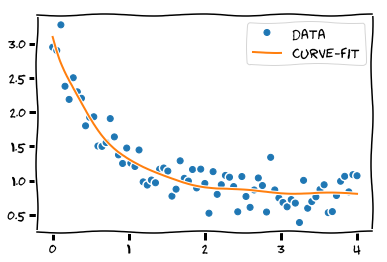

In [105]:
def f(x, a, b, c):
    return a*np.exp(-b*x) + c

# Setting some given data

x_given = np.linspace(0,4,75)
y_given = f(x_given,2.5,1.5,0.8) + 0.2*np.random.normal(size=len(x_given))

# do some curve fitting

params, extras = curve_fit(f, x_given, y_given)

# output / plotting results

print("a=%g, b=%g, c=%g" %(params[0], params[1], params[2]))

plt.plot(x_given, y_given, 'o')
plt.plot(x_given, f(x_given, params[0], params[1], params[2]))
plt.legend(['data', 'curve-fit'], loc='best')

# Some more simple calculus stuff
Go to https://sympy.org for more basics

In [111]:
from sympy import *
init_printing() # prints cool output

In [114]:
x, y, z = symbols('x,y,z')
my_ex = x*cos(x)
my_ex

In [115]:
# substituting this function
my_ex.subs(x, 1)

In [117]:
diff(cos(x), x) #diff is the derivative function in sympy

In [118]:
diff(exp(x**2), x)

In [120]:
diff(x**4, x, x, x) #can take multiple derivatives at once
diff(x**4, x, 3)

#### Below will compute the following

$\frac{\partial 7}{\partial x \partial y^2 \partial z^4}e^{xyz}$

In [122]:
expr = exp(x*y*z)
diff(expr, x,y,y,z,z,z,z)

In [123]:
diff(expr, x,y,y,z,4)

In [124]:
diff(expr, x,y,2,z,4)

In [125]:
# It can be called as a method
expr.diff(x,y,y,z,4)

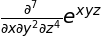

In [128]:
# Create unevaluated rerivative by using Derivative class
deriv = Derivative(expr, x,y,y,z,4)
deriv

In [129]:
type(Derivative)

sympy.core.assumptions.ManagedProperties

In [130]:
# Evaluate an unevaluated derivaive using doit method
deriv.doit()

## A bit more basics of Integrals 

$f(x) = \int_{0}^{∞}e^{-x} dx$

##### alt+5 = infinity symbol


In [131]:
integrate(exp(-x), (x,0, oo))

### Integrate this
$\int_{0}^{∞}\int_{-∞}^{∞}e^{-x^2-y^2} dxdy$

In [137]:
integrate(exp(-x**2 - y**2), (x, -oo, oo), (y, -oo, oo))

In [141]:
# if integrate isnt able to compute an integral, it returns an unevaluated Integral object
expr = integrate(x**x, x)
print(expr)

Integral(x**x, x)


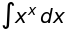

In [140]:
expr

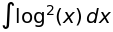

In [143]:
expr = Integral(log(x)**2, x)
expr

#### Itegrate uses powerful algorithms including heuristic pattern matching, Risch algorithm and Meijer G-functions
integrate uses powerful algorithms that are always improving to compute both definite and indefinite integrals. Here's a cool example.

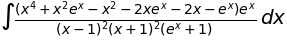

In [145]:
integ = Integral((x**4 + x**2*exp(x) - x**2 - 2*x*exp(x) - 2*x - \
                  exp(x))*exp(x)/((x - 1)**2*(x + 1)**2*(exp(x) + 1)), x)
integ

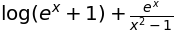

In [146]:
integ.doit()

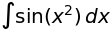

In [148]:
integ = Integral(sin(x**2), x)
integ

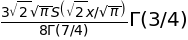

In [149]:
integ.doit()

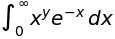

In [155]:
integ = Integral(x**y*exp(-x), (x,0,oo))
integ

In [156]:
integ.doit()

⎧ Γ(y + 1)    for -re(y) < 1
⎪                           
⎪∞                          
⎪⌠                          
⎨⎮  y  -x                   
⎪⎮ x ⋅ℯ   dx    otherwise   
⎪⌡                          
⎪0                          
⎩                           

In [157]:
help(Integral.doit)

Help on function doit in module sympy.integrals.integrals:

doit(self, **hints)
    Perform the integration using any hints given.
    
    Examples
    
    >>> from sympy import Integral
    >>> from sympy.abc import x, i
    >>> Integral(x**i, (i, 1, 3)).doit()
    Piecewise((2, Eq(log(x), 0)), (x**3/log(x) - x/log(x), True))
    
    See Also
    
    sympy.integrals.trigonometry.trigintegrate
    sympy.integrals.risch.heurisch
    sympy.integrals.rationaltools.ratint
    as_sum : Approximate the integral using a sum



## Coming up Limits... 

$\lim_{a \rightarrow b}{f(x)}$

In [161]:
limit(sin(x)/x, x, 0)

In [163]:
expr = x**2/exp(x)
expr.subs(x,oo)